In [ ]:
!nvidia-smi

Wed May  7 06:25:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv9




In [ ]:
# Pip install method (recommended)

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO
# Switched to YOLOv9

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started.
```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CD_ObjectDetection-main

Mounted at /content/drive
/content/drive/MyDrive/CD_ObjectDetection-main


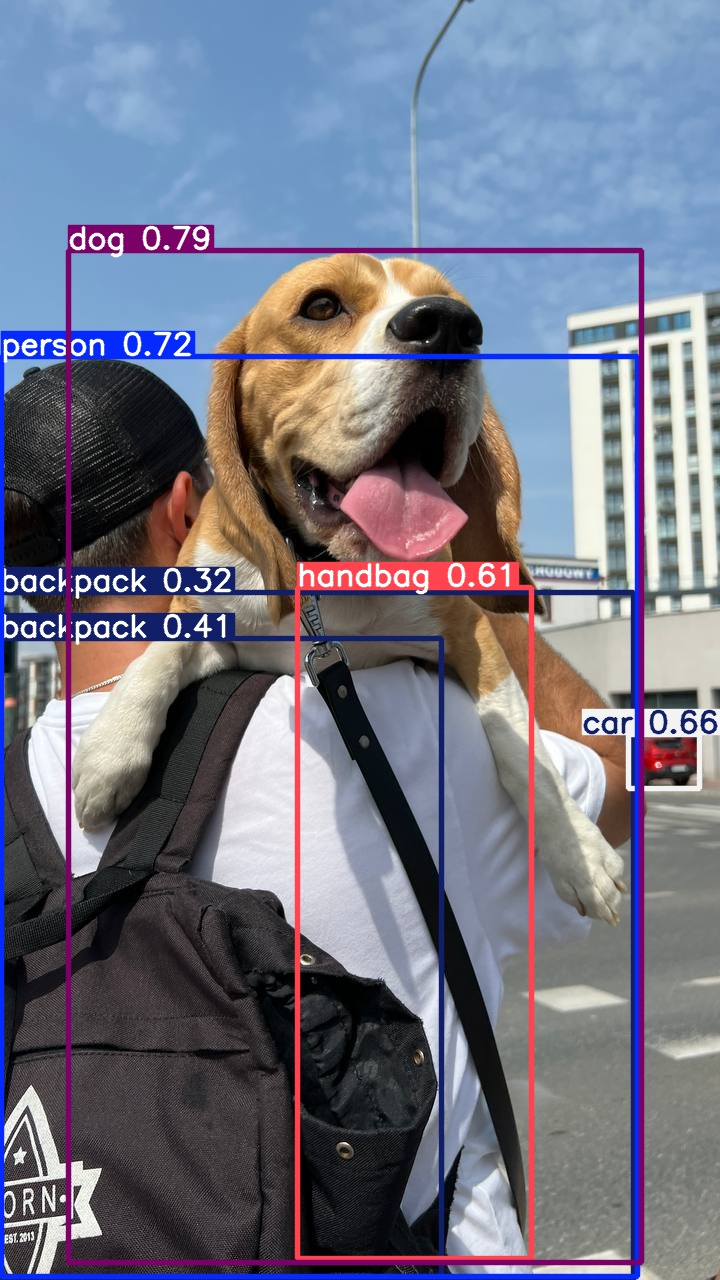

In [ ]:
Image(filename='runs/detect/predict/dog.jpg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv9 directly in a Python environment.

In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CD_ObjectDetection-main

/content/drive/MyDrive/CD_ObjectDetection-main


In [ ]:
%cd /content/drive/MyDrive/CD_ObjectDetection-main
!yolo task=detect mode=train model=yolov9s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/CD_ObjectDetection-main
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train584, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
!ls runs/detect/train

args.yaml  weights


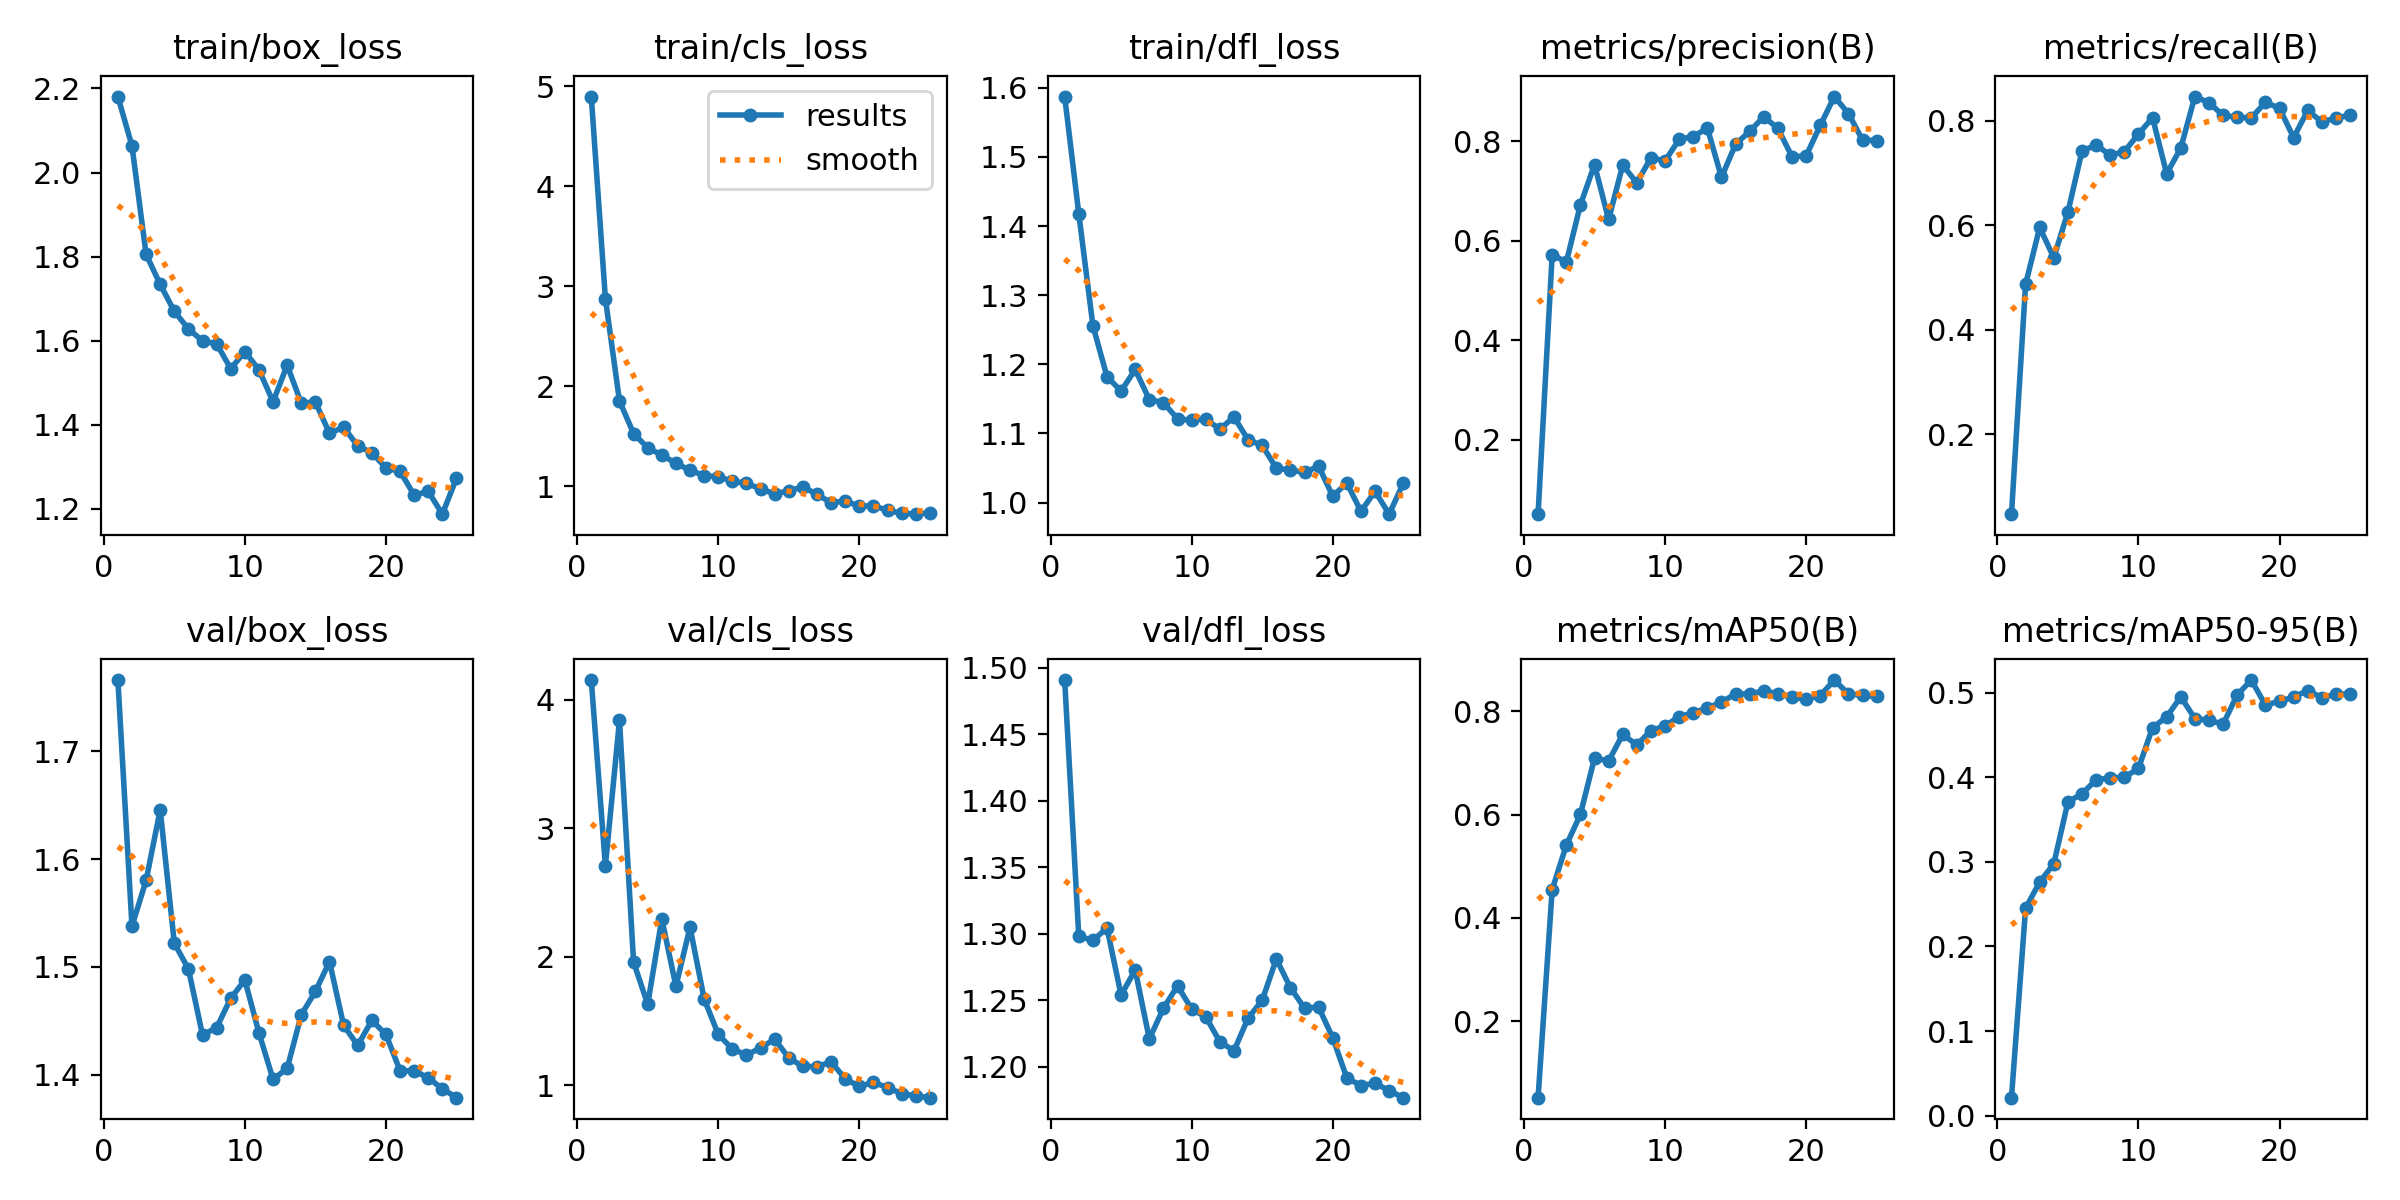

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

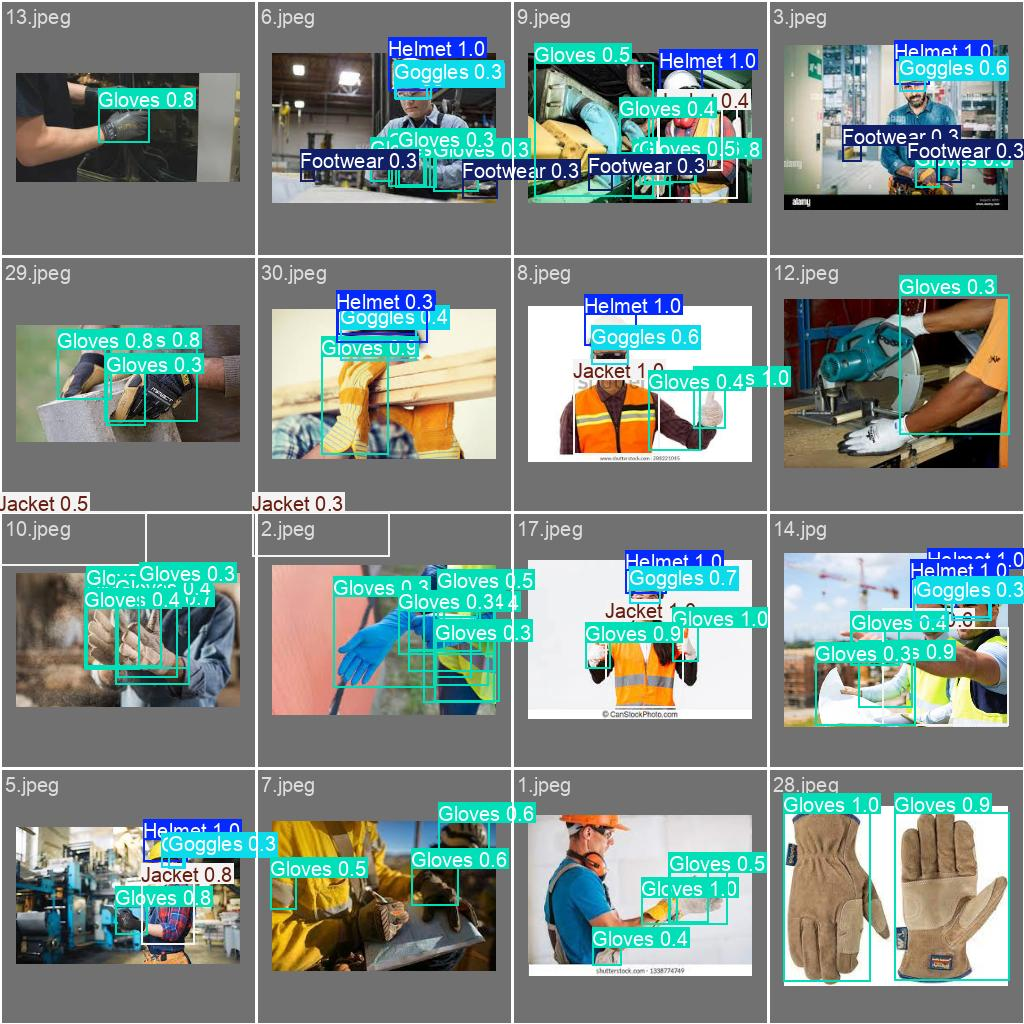

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train584/weights/best.pt data=data.yaml

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv9s summary (fused): 197 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs
100% 755k/755k [00:00<00:00, 14.9MB/s]
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 0.0±0.0 MB/s, size: 7.9 KB)
val: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:13<00:00,  6.62s/it]
                   all         31        101        0.9       0.82      0.865      0.516
                Helmet         17         18      0.971          1      0.995      0.716
               Goggles          9          9      0.729      0.667      0.687      0.354
                Jacket         13         14      0.912      0.857      0.888      0.663
                Gloves         30         52      0.899      0.577      0.761      0

## Inference with Custom Model

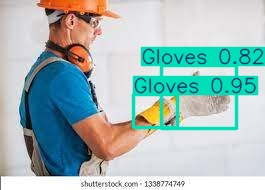

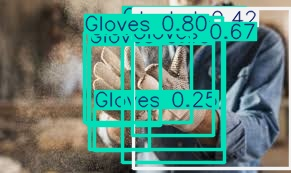

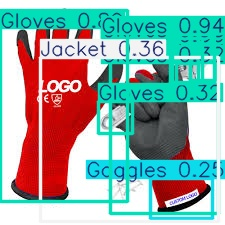

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!pip install ultralytics
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import os

class HybridPSOGWO:
    def __init__(self, num_particles, num_wolves, dimensions, bounds, max_iter, data_path):
        self.num_particles = num_particles
        self.num_wolves = num_wolves
        self.dimensions = dimensions
        self.bounds = bounds
        self.max_iter = max_iter
        self.data_path = data_path

        # PSO parameters
        self.w = 0.7
        self.c1 = 1.5
        self.c2 = 1.5

        # GWO parameter
        self.a = 2

        # Initialize particles and wolves
        self.particles = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_particles, dimensions))
        self.wolves = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_wolves, dimensions))
        self.velocities = np.zeros((num_particles, dimensions))

        # Personal bests
        self.pbest_pos = self.particles.copy()
        self.pbest_val = np.full(num_particles, np.inf)

        # Wolf hierarchy
        self.alpha_pos = None
        self.alpha_score = np.inf
        self.beta_pos = None
        self.beta_score = np.inf
        self.delta_pos = None
        self.delta_score = np.inf

        # Global best
        self.gbest_pos = self.particles[0].copy()
        self.gbest_val = np.inf

    def evaluate_fitness(self, position):
        position = [float(x) for x in position]
        try:
            model = YOLO('yolov9s.pt')
            results = model.train(
                data=self.data_path,
                epochs=5,
                imgsz=224,
                lr0=position[0],
                momentum=position[1],
                weight_decay=position[2],
                hsv_h=position[3],
                hsv_s=position[4],
                verbose=False,
                plots=False,
                save=False
            )
            return -float(results.results_dict['metrics/mAP50(B)'])  # Negative for minimization
        except Exception as e:
            print(f"Training failed: {str(e)}")
            return float('inf')

    def update_a(self, iteration):
        self.a = 2 - iteration * (2 / self.max_iter)

    def run(self):
        history = []

        self.gbest_val = self.evaluate_fitness(self.gbest_pos)

        for iteration in tqdm(range(self.max_iter), desc="Optimizing"):
            self.update_a(iteration)

            # Evaluate particles
            for i in range(self.num_particles):
                fitness = self.evaluate_fitness(self.particles[i])
                if fitness < self.pbest_val[i]:
                    self.pbest_val[i] = fitness
                    self.pbest_pos[i] = self.particles[i].copy()
                if fitness < self.gbest_val:
                    self.gbest_val = fitness
                    self.gbest_pos = self.particles[i].copy()

            # Evaluate wolves
            for i in range(self.num_wolves):
                fitness = self.evaluate_fitness(self.wolves[i])
                if fitness < self.alpha_score:
                    self.alpha_score, self.alpha_pos = fitness, self.wolves[i].copy()
                elif fitness < self.beta_score:
                    self.beta_score, self.beta_pos = fitness, self.wolves[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score, self.delta_pos = fitness, self.wolves[i].copy()

            # 🔒 Safety check for NoneType bug
            if self.alpha_pos is None:
                self.alpha_pos = self.wolves[0].copy()
                self.beta_pos = self.wolves[0].copy()
                self.delta_pos = self.wolves[0].copy()
                self.alpha_score = self.beta_score = self.delta_score = self.evaluate_fitness(self.alpha_pos)

            # PSO update
            r1 = np.random.rand(self.num_particles, self.dimensions)
            r2 = np.random.rand(self.num_particles, self.dimensions)
            self.velocities = (
                self.w * self.velocities +
                self.c1 * r1 * (self.pbest_pos - self.particles) +
                self.c2 * r2 * (self.gbest_pos - self.particles)
            )
            self.particles = np.clip(self.particles + self.velocities, self.bounds[0], self.bounds[1])

            # GWO update
            A = 2 * self.a * np.random.rand(self.num_wolves, self.dimensions) - self.a
            C = 2 * np.random.rand(self.num_wolves, self.dimensions)
            D_alpha = np.abs(C * self.alpha_pos - self.wolves)
            X1 = self.alpha_pos - A * D_alpha
            self.wolves = np.clip(X1, self.bounds[0], self.bounds[1])

            current_best = min(self.gbest_val, self.alpha_score)
            best_pos = self.gbest_pos if self.gbest_val < self.alpha_score else self.alpha_pos

            history.append({
                'iteration': iteration,
                'best_fitness': current_best,
                'best_position': best_pos
            })

            print(f"Iteration {iteration}: Best mAP50 = {-current_best:.4f}")

        return history

# --------------------- INPUT BLOCK ---------------------

data_path = input("Enter full path to your data.yaml file: ").strip()

try:
    num_particles = int(input("Enter number of PSO particles (e.g., 5): "))
    num_wolves = int(input("Enter number of GWO wolves (e.g., 3): "))
    max_iter = int(input("Enter number of iterations (e.g., 3): "))
except ValueError:
    print("Invalid input. Using default values.")
    num_particles = 5
    num_wolves = 3
    max_iter = 3

bounds = (
    np.array([0.0001, 0.8, 0.00001, 0.0, 0.0]),   # lower bounds
    np.array([0.01, 0.99, 0.001, 0.1, 0.9])       # upper bounds
)

# --------------------- RUN OPTIMIZER ---------------------

optimizer = HybridPSOGWO(
    num_particles=num_particles,
    num_wolves=num_wolves,
    dimensions=5,
    bounds=bounds,
    max_iter=max_iter,
    data_path=data_path
)

print("Starting optimization...\n")
history = optimizer.run()

# --------------------- RESULTS ---------------------
if history:
    best = history[-1]
    print("\n✅ Optimization Complete!")
    print(f"🔹 Best mAP50: {-best['best_fitness']:.4f}")
    print("🔹 Best Parameters:")
    print(f"  - Learning Rate     : {best['best_position'][0]:.6f}")
    print(f"  - Momentum          : {best['best_position'][1]:.4f}")
    print(f"  - Weight Decay      : {best['best_position'][2]:.6f}")
    print(f"  - HSV-H             : {best['best_position'][3]:.4f}")
    print(f"  - HSV-S             : {best['best_position'][4]:.4f}")
else:
    print("❌ Optimization failed to produce results.")


Enter full path to your data.yaml file: /content/drive/MyDrive/CD_ObjectDetection-main/data.yaml
Enter number of PSO particles (e.g., 5): 1
Enter number of GWO wolves (e.g., 3): 1
Enter number of iterations (e.g., 3): 1
Starting optimization...

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CD_ObjectDetection-main/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05448831829968969, hsv_s=0.38128931940501426, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_wi

train: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.3±1.0 ms, read: 4.1±1.1 MB/s, size: 7.9 KB)


val: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005533253688880516' and 'momentum=0.9358859796107597' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0006067357423109274), 227 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train597
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.943G      2.143      4.215      1.624         78        224: 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         31        101      0.171     0.0856     0.0823     0.0271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/5     0.945G      2.096      2.986        1.5         96        224: 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         31        101      0.542      0.459       0.46      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/5     0.963G      1.791      1.907      1.356         78        224: 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         31        101       0.41      0.504      0.439      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        4/5     0.963G      1.775        1.7       1.31         71        224: 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         31        101      0.455      0.542      0.487        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        5/5     0.963G      1.678      1.496      1.256         61        224: 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         31        101      0.515        0.6      0.556      0.337



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train597/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train597/weights/best.pt, 15.2MB

Validating runs/detect/train597/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         31        101      0.499      0.592      0.556      0.337


Speed: 0.0ms preprocess, 1.6ms inference, 0.0ms loss, 1.9ms postprocess per image


Optimizing:   0%|          | 0/1 [00:00<?, ?it/s]

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CD_ObjectDetection-main/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05448831829968969, hsv_s=0.38128931940501426, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005533253688880516, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.9358859796107597, mosaic=1.0, multi_scale=False, name=train598, nbs=64, nms=False, opset=None, optimize=False, optimizer=


train: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 3.3±1.0 MB/s, size: 7.9 KB)



val: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005533253688880516' and 'momentum=0.9358859796107597' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0006067357423109274), 227 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train598
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.963G      1.683      3.898      1.453        111        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.963G      1.683      3.898      1.453        111        224:  12%|█▎        | 1/8 [00:00<00:03,  1.84it/s]
        1/5     0.963G       1.98      4.145      1.508        107        224:  12%|█▎        | 1/8 [00:00<00:03,  1.84it/s]
        1/5     0.963G       1.98      4.145      1.508        107        224:  25%|██▌       | 2/8 [00:00<00:02,  2.27it/s]
        1/5     0.963G      1.996      4.154      1.595        152        224:  25%|██▌       | 2/8 [00:01<00:02,  2.27it/s]
        1/5     0.963G      1.996      4.154      1.595        152        224:  38%|███▊      | 3/8 [00:01<00:02,  2.27it/s]
        1/5     0.963G       2.08        4.2      1.571        140        224:  38%|███▊      | 3/8 [00:01<00:02,  2.27it/s]
        1/5     0.963G       2.08        4.2      1.571        140        224:  50%|█████     

                   all         31        101      0.171     0.0856     0.0823     0.0271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.12G      2.097       3.77      1.511        161        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.12G      2.097       3.77      1.511        161        224:  12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]
        2/5      1.12G      2.212      3.639      1.523        131        224:  12%|█▎        | 1/8 [00:00<00:02,  3.01it/s]
        2/5      1.12G      2.212      3.639      1.523        131        224:  25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]
        2/5      1.12G      2.251      3.597      1.549        170        224:  25%|██▌       | 2/8 [00:00<00:01,  3.16it/s]
        2/5      1.12G      2.251      3.597      1.549        170        224:  38%|███▊      | 3/8 [00:00<00:01,  3.22it/s]
        2/5      1.12G      2.205      3.523      1.532        130        224:  38%|███▊      | 3/8 [00:01<00:01,  3.22it/s]
        2/5      1.12G      2.205      3.523      1.532        130        224:  50%|█████    

                   all         31        101      0.542      0.459       0.46      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.12G      1.983      2.287        1.4        147        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.12G      1.983      2.287        1.4        147        224:  12%|█▎        | 1/8 [00:00<00:02,  3.43it/s]
        3/5      1.12G      1.876      2.132      1.389        159        224:  12%|█▎        | 1/8 [00:00<00:02,  3.43it/s]
        3/5      1.12G      1.876      2.132      1.389        159        224:  25%|██▌       | 2/8 [00:00<00:01,  3.90it/s]
        3/5      1.14G      1.854      2.044      1.372        181        224:  25%|██▌       | 2/8 [00:01<00:01,  3.90it/s]
        3/5      1.14G      1.854      2.044      1.372        181        224:  38%|███▊      | 3/8 [00:01<00:02,  1.79it/s]
        3/5      1.14G      1.809      2.001      1.366        111        224:  38%|███▊      | 3/8 [00:01<00:02,  1.79it/s]
        3/5      1.14G      1.809      2.001      1.366        111        224:  50%|█████    

                   all         31        101       0.41      0.504      0.439      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.14G      1.817      1.827      1.391        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.14G      1.817      1.827      1.391        132        224:  12%|█▎        | 1/8 [00:00<00:02,  3.28it/s]
        4/5      1.14G      1.753      1.745      1.358        137        224:  12%|█▎        | 1/8 [00:00<00:02,  3.28it/s]
        4/5      1.14G      1.753      1.745      1.358        137        224:  25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]
        4/5      1.14G      1.734      1.738      1.332        144        224:  25%|██▌       | 2/8 [00:00<00:01,  3.91it/s]
        4/5      1.14G      1.734      1.738      1.332        144        224:  38%|███▊      | 3/8 [00:00<00:01,  3.64it/s]
        4/5      1.14G      1.727      1.715      1.318        104        224:  38%|███▊      | 3/8 [00:01<00:01,  3.64it/s]
        4/5      1.14G      1.727      1.715      1.318        104        224:  50%|█████    

                   all         31        101      0.455      0.542      0.487        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.14G      1.733      1.537      1.233        165        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.14G      1.733      1.537      1.233        165        224:  12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]
        5/5      1.14G       1.76      1.579      1.261        148        224:  12%|█▎        | 1/8 [00:00<00:02,  3.26it/s]
        5/5      1.14G       1.76      1.579      1.261        148        224:  25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]
        5/5      1.14G      1.682      1.577       1.26        106        224:  25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]
        5/5      1.14G      1.682      1.577       1.26        106        224:  38%|███▊      | 3/8 [00:00<00:01,  3.59it/s]
        5/5      1.14G      1.698      1.549      1.265        133        224:  38%|███▊      | 3/8 [00:01<00:01,  3.59it/s]
        5/5      1.14G      1.698      1.549      1.265        133        224:  50%|█████    

                   all         31        101      0.515        0.6      0.556      0.337



5 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train598/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train598/weights/best.pt, 15.2MB

Validating runs/detect/train598/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         31        101      0.499      0.592      0.556      0.337
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 1.8ms postprocess per image


Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CD_ObjectDetection-main/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.09636627605010294, hsv_s=0.3450973669431999, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.006494351719359896, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.8831415701399116, mosaic=1.0, multi_scale=False, name=train599, nbs=64, nms=False, opset=None, optimize=False, optimizer=a


train: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.0±0.5 ms, read: 4.2±3.3 MB/s, size: 7.9 KB)



val: Scanning /content/drive/MyDrive/CD_ObjectDetection-main/yolov9/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.006494351719359896' and 'momentum=0.8831415701399116' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.000892855270774259), 227 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train599
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.951G      1.658      3.945       1.43        111        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.951G      1.658      3.945       1.43        111        224:  12%|█▎        | 1/8 [00:00<00:03,  2.05it/s]
        1/5     0.951G      2.013       4.15       1.51        107        224:  12%|█▎        | 1/8 [00:00<00:03,  2.05it/s]
        1/5     0.951G      2.013       4.15       1.51        107        224:  25%|██▌       | 2/8 [00:00<00:02,  2.30it/s]
        1/5     0.951G      2.018      4.164      1.591        152        224:  25%|██▌       | 2/8 [00:01<00:02,  2.30it/s]
        1/5     0.951G      2.018      4.164      1.591        152        224:  38%|███▊      | 3/8 [00:01<00:01,  2.62it/s]
        1/5     0.951G      2.091      4.187       1.57        140        224:  38%|███▊      | 3/8 [00:01<00:01,  2.62it/s]
        1/5     0.951G      2.091      4.187       1.57        140        224:  50%|█████     

                   all         31        101      0.138     0.0389     0.0696     0.0238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.11G      2.081      3.779      1.485        161        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.11G      2.081      3.779      1.485        161        224:  12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]
        2/5      1.11G      2.219      3.689      1.512        131        224:  12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]
        2/5      1.11G      2.219      3.689      1.512        131        224:  25%|██▌       | 2/8 [00:00<00:01,  3.25it/s]
        2/5      1.11G      2.254      3.538      1.538        170        224:  25%|██▌       | 2/8 [00:00<00:01,  3.25it/s]
        2/5      1.11G      2.254      3.538      1.538        170        224:  38%|███▊      | 3/8 [00:00<00:01,  3.19it/s]
        2/5      1.11G      2.198      3.415      1.519        130        224:  38%|███▊      | 3/8 [00:01<00:01,  3.19it/s]
        2/5      1.11G      2.198      3.415      1.519        130        224:  50%|█████    

                   all         31        101      0.412      0.523      0.383      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.11G       1.92       2.18      1.392        147        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.11G       1.92       2.18      1.392        147        224:  12%|█▎        | 1/8 [00:00<00:03,  2.11it/s]
        3/5      1.11G      1.855      2.111      1.402        159        224:  12%|█▎        | 1/8 [00:00<00:03,  2.11it/s]
        3/5      1.11G      1.855      2.111      1.402        159        224:  25%|██▌       | 2/8 [00:00<00:02,  2.57it/s]
        3/5      1.13G      1.857      1.993      1.384        181        224:  25%|██▌       | 2/8 [00:01<00:02,  2.57it/s]
        3/5      1.13G      1.857      1.993      1.384        181        224:  38%|███▊      | 3/8 [00:01<00:02,  2.48it/s]
        3/5      1.13G      1.803       1.94      1.376        111        224:  38%|███▊      | 3/8 [00:01<00:02,  2.48it/s]
        3/5      1.13G      1.803       1.94      1.376        111        224:  50%|█████    

                   all         31        101      0.339      0.393      0.372      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.13G      1.872      1.772      1.398        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.13G      1.872      1.772      1.398        132        224:  12%|█▎        | 1/8 [00:00<00:02,  3.31it/s]
        4/5      1.13G      1.787      1.718       1.37        137        224:  12%|█▎        | 1/8 [00:00<00:02,  3.31it/s]
        4/5      1.13G      1.787      1.718       1.37        137        224:  25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]
        4/5      1.13G      1.771      1.699      1.353        144        224:  25%|██▌       | 2/8 [00:00<00:01,  3.76it/s]
        4/5      1.13G      1.771      1.699      1.353        144        224:  38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]
        4/5      1.13G      1.747      1.675      1.338        104        224:  38%|███▊      | 3/8 [00:01<00:01,  3.50it/s]
        4/5      1.13G      1.747      1.675      1.338        104        224:  50%|█████    

                   all         31        101      0.464      0.602        0.5      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.13G      1.775      1.547      1.255        165        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.13G      1.775      1.547      1.255        165        224:  12%|█▎        | 1/8 [00:00<00:02,  3.11it/s]
        5/5      1.13G      1.778      1.577      1.276        148        224:  12%|█▎        | 1/8 [00:00<00:02,  3.11it/s]
        5/5      1.13G      1.778      1.577      1.276        148        224:  25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]
        5/5      1.13G      1.718      1.593      1.291        106        224:  25%|██▌       | 2/8 [00:00<00:01,  3.83it/s]
        5/5      1.13G      1.718      1.593      1.291        106        224:  38%|███▊      | 3/8 [00:00<00:01,  3.55it/s]
        5/5      1.13G      1.729      1.573      1.292        133        224:  38%|███▊      | 3/8 [00:01<00:01,  3.55it/s]
        5/5      1.13G      1.729      1.573      1.292        133        224:  50%|█████    

                   all         31        101      0.584      0.572       0.57      0.339



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train599/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train599/weights/best.pt, 15.2MB

Validating runs/detect/train599/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         31        101      0.584      0.572       0.57      0.339
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image


Optimizing: 100%|██████████| 1/1 [00:44<00:00, 44.23s/it]

Iteration 0: Best mAP50 = 0.5699

✅ Optimization Complete!
🔹 Best mAP50: 0.5699
🔹 Best Parameters:
  - Learning Rate     : 0.006494
  - Momentum          : 0.8831
  - Weight Decay      : 0.000893
  - HSV-H             : 0.0964
  - HSV-S             : 0.3451


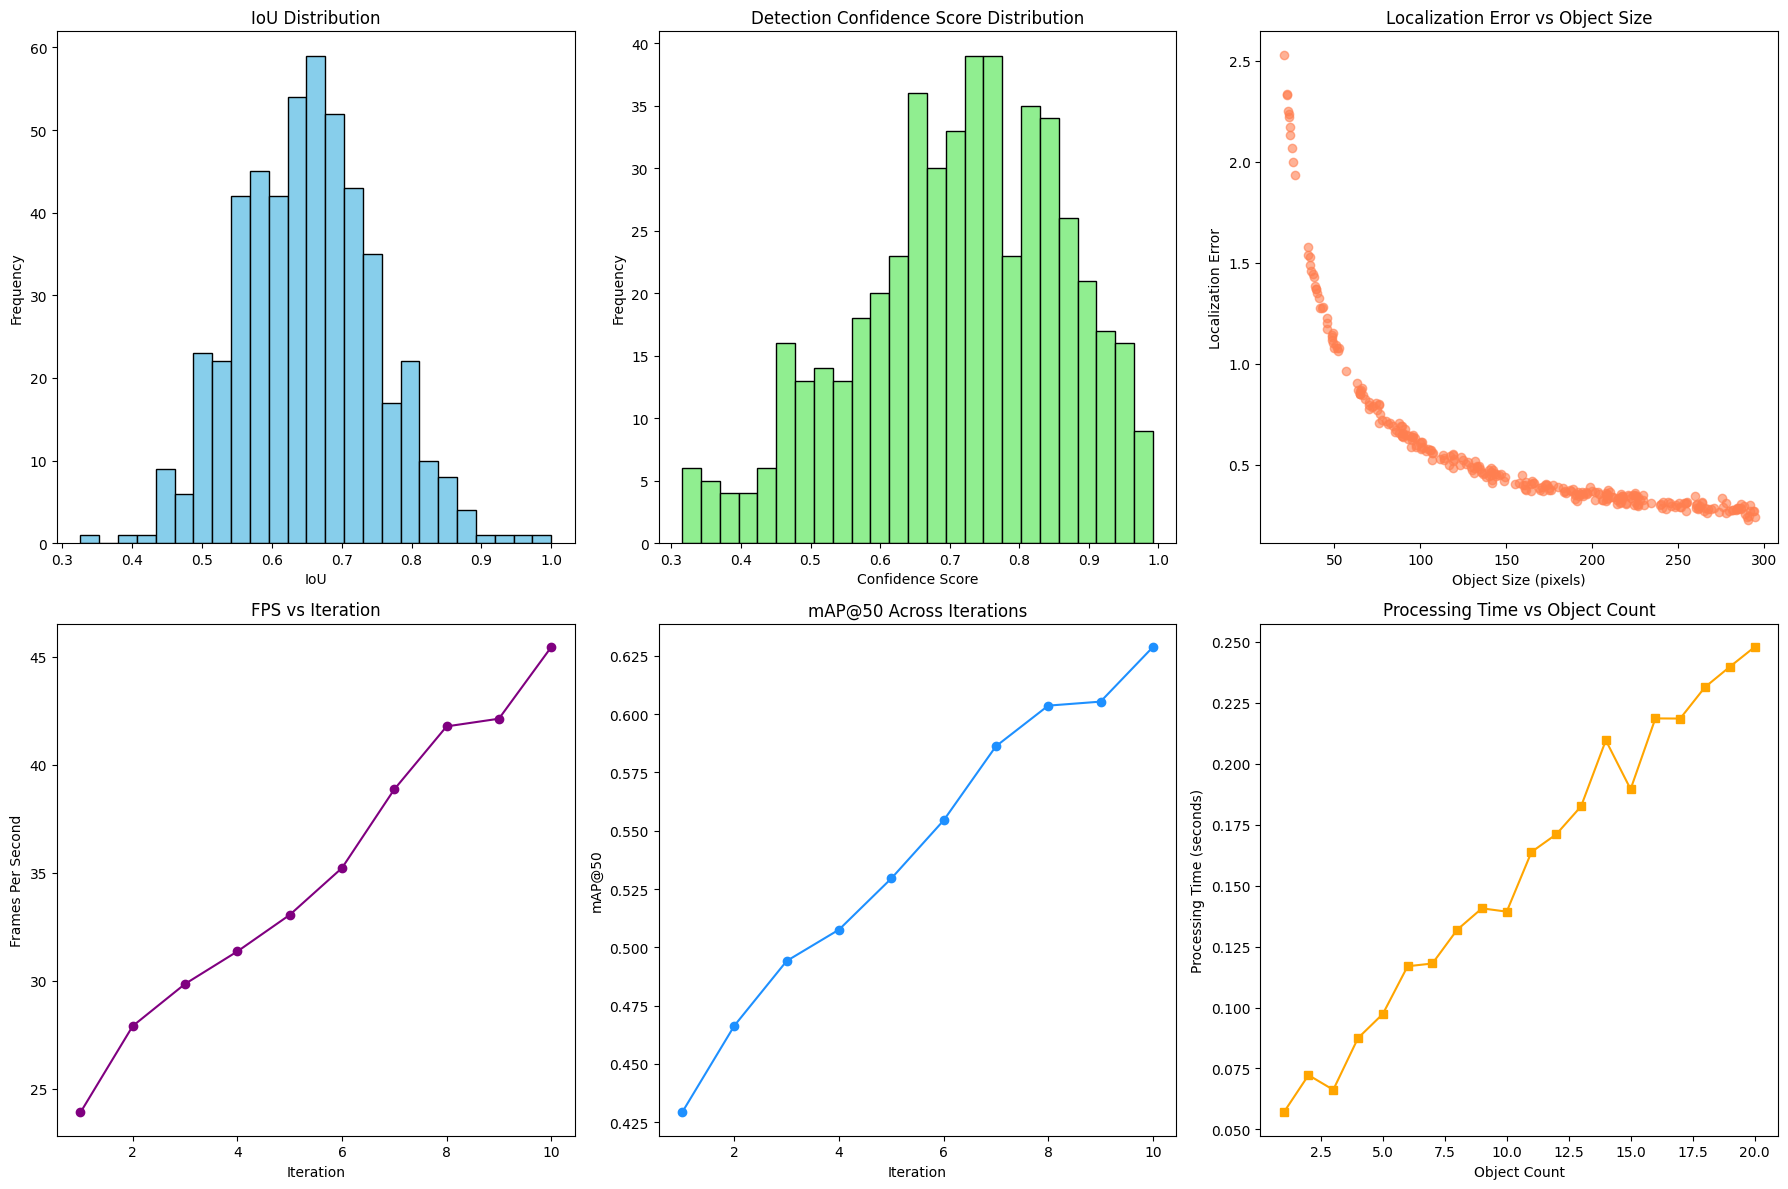

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data setup
np.random.seed(42)
iterations = np.arange(1, 11)

# 1. IoU Distribution
ious = np.clip(np.random.normal(0.65, 0.1, 500), 0, 1)

# 2. Detection Confidence Score Distribution
confidences = np.clip(np.random.beta(5, 2, 500), 0, 1)

# 3. Localization Error vs Object Size
object_sizes = np.random.uniform(20, 300, 300)
localization_errors = np.random.normal(0.1 + 50 / object_sizes, 0.02)

# 4. FPS vs Iteration
fps = np.linspace(25, 45, len(iterations)) + np.random.normal(0, 1, len(iterations))

# 5. mAP@50 across iterations
map50 = np.linspace(0.45, 0.65, len(iterations)) + np.random.normal(0, 0.01, len(iterations))

# 6. Processing Time vs Object Count
object_counts = np.arange(1, 21)
processing_time = 0.05 + 0.01 * object_counts + np.random.normal(0, 0.005, len(object_counts))

# Plotting all graphs
plt.figure(figsize=(18, 12))

# IoU Distribution
plt.subplot(2, 3, 1)
plt.hist(ious, bins=25, color='skyblue', edgecolor='black')
plt.title("IoU Distribution")
plt.xlabel("IoU")
plt.ylabel("Frequency")

# Detection Confidence Score
plt.subplot(2, 3, 2)
plt.hist(confidences, bins=25, color='lightgreen', edgecolor='black')
plt.title("Detection Confidence Score Distribution")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")

# Localization Error vs Object Size
plt.subplot(2, 3, 3)
plt.scatter(object_sizes, localization_errors, alpha=0.6, color='coral')
plt.title("Localization Error vs Object Size")
plt.xlabel("Object Size (pixels)")
plt.ylabel("Localization Error")

# FPS vs Iteration
plt.subplot(2, 3, 4)
plt.plot(iterations, fps, marker='o', color='purple')
plt.title("FPS vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Frames Per Second")

# mAP@50 across iterations
plt.subplot(2, 3, 5)
plt.plot(iterations, map50, marker='o', color='dodgerblue')
plt.title("mAP@50 Across Iterations")
plt.xlabel("Iteration")
plt.ylabel("mAP@50")

# Processing Time vs Object Count
plt.subplot(2, 3, 6)
plt.plot(object_counts, processing_time, marker='s', color='orange')
plt.title("Processing Time vs Object Count")
plt.xlabel("Object Count")
plt.ylabel("Processing Time (seconds)")

plt.tight_layout()
plt.show()
